## Read datasets

In [1]:
import pandas as pd
random_state = 42
import warnings
warnings.filterwarnings('ignore')
from source.read_data import read_artificial_data, read_spam
from source.feature_selection_methods import change_data_with_selected_features, change_all_datasets
from source.feature_selection_methods import boruta_select_features, chi2_select_features, rfe_select_features, gini_select_features, ss_select_features, l1_select_features
from source.metrics import balanced_accuracy, artificial_score, spam_score
from source.models import train_model, sequential_search_train_model
from source.number_of_features import search_best_features, search_best_C, plot_results, plot_results_best_C

### Artificial dataset

In [4]:
art_train_X, art_train_y, art_val_X, art_val_y, art_test_data = read_artificial_data("data")
art_train_X.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
968,494,476,461,463,506,480,463,477,509,483,...,500,471,532,274,486,502,489,487,504,461
240,489,455,479,501,542,473,534,475,482,478,...,494,476,468,619,519,491,469,505,536,495
819,481,467,597,479,469,483,467,475,497,490,...,519,473,503,547,477,504,478,504,488,490
692,480,460,558,477,555,470,528,477,490,480,...,490,477,469,368,494,530,477,488,512,484
420,477,488,492,496,462,479,447,476,450,473,...,519,476,490,716,594,499,486,486,472,491


### Spam dataset
Transformed with use of [repo](https://github.com/edumunozsala/Intro-NLP-Text-Classification/blob/master/Intro_NLP_1_TFIDF_Text_Classification.ipynb)

In [2]:
spam_train_X, spam_train_y, spam_val_X, spam_val_y, spam_test_data = read_spam("data")
spam_train_X.head()

,00,000,000pes,008704050406,0121,01223585236,01223585334,02,0207,02073162414,...,zed,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature selection methods
1. Boruta
2. Chi-squared
3. Recursive Feature Elimination
4. Gini
5. Sequential Forward Search
6. Sequential Backward Search
7. L1 

## Models

In [44]:
models=['xgb', 'lda', 'svc', 'lr', 'rf', 'dt', 'knn']

## Experiment 1 
### Use each method in combination with each model.

For Artificial data using number of features = 10 for chi2, rfe and gini, for l1 C=0.01

For spam data using number of features = 100 for chi2, rfe and gini, for l1 C=0.01

### Artificial data

In [ ]:
no_features = 10

#### 1. Boruta

In [10]:
%%capture
art_boruta_features=boruta_select_features(art_train_X, art_train_y)
art_train_X_boruta2, art_val_X_boruta2, art_test_data_boruta2 = change_all_datasets(art_train_X, art_val_X, art_test_data, art_boruta_features, boruta=True)

In [11]:
%%capture 
all_scores_artificial_boruta=pd.DataFrame(index=models, columns=['BA boruta', 'Score boruta'])
for model in models:
    BA, score=train_model(model, art_train_X_boruta2, art_train_y, art_val_X_boruta2, art_val_y, 'artificial')
    all_scores_artificial_boruta.loc[model]=[BA, score]

#### 2. Chi-squared

In [45]:
%%capture
art_chi2_features=chi2_select_features(art_train_X, art_train_y, no_features)
art_train_X_chi2, art_val_X_chi2, art_test_data_chi2 = change_all_datasets(art_train_X, art_val_X, art_test_data, art_chi2_features)

In [46]:
%%capture 
all_scores_artificial_chi=pd.DataFrame(index=models, columns=['BA chi', 'Score chi'])
for model in models:
    BA, score=train_model(model, art_train_X_chi2, art_train_y, art_val_X_chi2, art_val_y, 'artificial')
    all_scores_artificial_chi.loc[model]=[BA, score]

#### 3. Recursive Feature Elimination

In [47]:
%%capture
art_rfe_features=rfe_select_features(art_train_X, art_train_y, no_features)
art_train_X_rfe, art_val_X_rfe, art_test_data_rfe=change_all_datasets(art_train_X, art_val_X, art_test_data, art_rfe_features)

In [48]:
%%capture 
all_scores_artificial_rfe=pd.DataFrame(index=models, columns=['BA rfe', 'Score rfe'])
for model in models:
    BA, score=train_model(model, art_train_X_rfe, art_train_y, art_val_X_rfe, art_val_y, 'artificial')
    all_scores_artificial_rfe.loc[model]=[BA, score]

#### 4. Gini

In [49]:
%%capture
art_gini_features=gini_select_features(art_train_X, art_train_y, depth=3, if_less=True, num_feats=no_features)
art_train_X_gini, art_val_X_gini, art_test_data_gini=change_all_datasets(art_train_X, art_val_X, art_test_data, art_gini_features)

In [50]:
%%capture 
all_scores_artificial_gini=pd.DataFrame(index=models, columns=['BA gini', 'Score gini'])
for model in models:
    BA, score=train_model(model, art_train_X_gini, art_train_y, art_val_X_gini, art_val_y, 'artificial')
    all_scores_artificial_gini.loc[model]=[BA, score]

#### 5. Sequential Forward Search

In [ ]:
#%%capture 
#all_scores_artificial_sfs=pd.DataFrame(index=models, columns=['BA sfs', 'Score sfs'])
#for model in models:
#    BA, score=sequential_search_train_model(model, art_train_X, art_train_y, art_val_X, art_val_y,'artificial', no_features, "forward")
#    all_scores_artificial_sfs.loc[model]=[BA, score]

In [ ]:
#all_scores_artificial_sfs.to_csv("scores/all_scores_artificial_sfs.csv")

#### 6. Sequential Backward Search

In [12]:
#%%capture 
#all_scores_artificial_sbs=pd.DataFrame(index=models, columns=['BA sbs', 'Score sbs'])
#for model in models:
#    BA, score=sequential_search_train_model(model, art_train_X, art_train_y, art_val_X, art_val_y,'artificial', no_features, "backward")
#    all_scores_artificial_sbs.loc[model]=[BA, score]

In [ ]:
#all_scores_artificial_sbs.to_csv("scores/all_scores_artificial_sbs.csv")

#### 5. L1 

In [19]:
%%capture
art_l1_features = l1_select_features(art_train_X, art_train_y)
art_train_X_l1, art_val_X_l1, art_test_data_l1 = change_all_datasets(art_train_X, art_val_X, art_test_data, art_l1_features)

In [20]:
%%capture 
all_scores_artificial_l1=pd.DataFrame(index=models, columns=['BA l1', 'Score l1'])
for model in models:
    BA, score=train_model(model, art_train_X_l1, art_train_y, art_val_X_l1, art_val_y, 'spam')
    all_scores_artificial_l1.loc[model]=[BA, score]

#### 6. Lasso 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
def lasso_select_features(X, y):
    features = X.columns
    pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())])
    search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="balanced_accuracy",verbose=3)
    search.fit(X,y)
    coefficients = search.best_estimator_.named_steps['model'].coef_
    importance = np.abs(coefficients)
    lasso_selected_features = np.array(features)[importance > 0]
    return lasso_selected_features

def change_data_with_selected_features(X, features, boruta_lasso=False):
    column_names=X.columns
    if boruta_lasso:
        features=np.where(features>0)
        features=features[0].tolist()
    column_names=column_names[features]
    X=X[column_names]
    return X

In [ ]:
%%capture
art_lasso_features = lasso_select_features(art_train_X, art_train_y)

#### Artificial - results

In [51]:
all_results_artificial=pd.concat([all_scores_artificial_boruta, all_scores_artificial_chi, all_scores_artificial_rfe, all_scores_artificial_gini, all_scores_artificial_l1], axis=1)
all_results_artificial

,BA boruta,Score boruta,BA chi,Score chi,BA rfe,Score rfe,BA gini,Score gini,BA l1,Score l1
xgb,0.870046,0.838046,0.854742,0.844742,0.502501,0.492501,0.809807,0.799807,0.812495,0.778595
lda,0.545198,0.513198,0.557288,0.547288,0.485109,0.475109,0.549974,0.539974,0.534595,0.500695
svc,0.846978,0.814978,0.821372,0.811372,0.480483,0.470483,0.766135,0.756135,0.631855,0.597955
lr,0.547511,0.515511,0.557288,0.547288,0.482721,0.472721,0.557288,0.547288,0.537058,0.503158
rf,0.874747,0.842747,0.852204,0.842204,0.497199,0.487199,0.829812,0.819812,0.66455,0.63065
dt,0.795104,0.763104,0.82011,0.81011,0.507277,0.497277,0.729864,0.719864,0.780701,0.746801
knn,0.87736,0.84536,0.887287,0.877287,0.492723,0.482723,0.852354,0.842354,0.719637,0.685737


Best method for each model:
- xgb - boruta
- lda - chi2
- SVC - boruta
- LR - chi2/gini
- RF - boruta
- DT - chi2
- kNN - chi2

In [52]:
all_results_artificial.to_csv("scores/all_results_artificial.csv")

### Spam dataset

In [24]:
no_features = 100

#### 1. Boruta

In [25]:
%%capture
spam_boruta_features=boruta_select_features(spam_train_X, spam_train_y)
spam_train_X_boruta2, spam_val_X_boruta2, spam_test_data_boruta2 = change_all_datasets(spam_train_X, spam_val_X, spam_test_data, spam_boruta_features, boruta=True)

In [26]:
%%capture 
all_scores_spam_boruta=pd.DataFrame(index=models, columns=['BA boruta', 'Score boruta'])
for model in models:
    BA, score=train_model(model, spam_train_X_boruta2, spam_train_y, spam_val_X_boruta2, spam_val_y, 'spam')
    all_scores_spam_boruta.loc[model]=[BA, score]

#### 2. Chi-squared

In [27]:
%%capture
spam_chi2_features=chi2_select_features(spam_train_X, spam_train_y, no_features)
spam_train_X_chi2, spam_val_X_chi2, spam_test_data_chi2 = change_all_datasets(spam_train_X, spam_val_X, spam_test_data, spam_chi2_features)

In [28]:
%%capture 
all_scores_spam_chi=pd.DataFrame(index=models, columns=['BA chi', 'Score chi'])
for model in models:
    BA, score=train_model(model, spam_train_X_chi2, spam_train_y, spam_val_X_chi2, spam_val_y, 'spam')
    all_scores_spam_chi.loc[model]=[BA, score]

#### 3. Recursive Feature Elimination

In [29]:
%%capture
spam_rfe_features=rfe_select_features(spam_train_X, spam_train_y, no_features)
spam_train_X_rfe, spam_val_X_rfe, spam_test_data_rfe=change_all_datasets(spam_train_X, spam_val_X, spam_test_data, spam_rfe_features)

In [30]:
%%capture 
all_scores_spam_rfe=pd.DataFrame(index=models, columns=['BA rfe', 'Score rfe'])
for model in models:
    BA, score=train_model(model, spam_train_X_rfe, spam_train_y, spam_val_X_rfe, spam_val_y, 'spam')
    all_scores_spam_rfe.loc[model]=[BA, score]

#### 4. Gini

In [32]:
%%capture
spam_gini_features=gini_select_features(spam_train_X, spam_train_y, depth=3, if_less=True, num_feats=no_features)
spam_train_X_gini, spam_val_X_gini, spam_test_data_gini=change_all_datasets(spam_train_X, spam_val_X, spam_test_data, spam_gini_features)

In [33]:
%%capture 
all_scores_spam_gini=pd.DataFrame(index=models, columns=['BA gini', 'Score gini'])
for model in models:
    BA, score=train_model(model, spam_train_X_gini, spam_train_y, spam_val_X_gini, spam_val_y, 'spam')
    all_scores_spam_gini.loc[model]=[BA, score]

#### 5. Sequential Forward Search

In [ ]:
#%%capture 
#all_scores_spam_sfs=pd.DataFrame(index=models, columns=['BA sfs', 'Score sfs'])
#for model in models:
#    BA, score=sequential_search_train_model(model, spam_train_X, spam_train_y, spam_val_X, spam_val_y,'spam', no_features, "forward")
#    all_scores_spam_sfs.loc[model]=[BA, score]

In [ ]:
#all_scores_spam_sfs.to_csv("scores/all_scores_spam_sfs.csv")

#### 6. Sequential Backward Search

In [ ]:
#%%capture 
#all_scores_spam_sbs=pd.DataFrame(index=models, columns=['BA sbs', 'Score sbs'])
#for model in models:
#    BA, score=sequential_search_train_model(model, spam_train_X, spam_train_y, spam_val_X, spam_val_y,'spam', no_features, "backward")
#    all_scores_spam_sbs.loc[model]=[BA, score]

In [ ]:
#all_scores_spam_sbs.to_csv("scores/all_scores_spam_sbs.csv")

#### 5. L1 

In [37]:
%%capture
spam_l1_features = l1_select_features(spam_train_X, spam_train_y)
spam_train_X_l1, spam_val_X_l1, spam_test_data_l1 = change_all_datasets(spam_train_X, spam_val_X, spam_test_data, spam_l1_features)

In [38]:
%%capture 
all_scores_spam_l1=pd.DataFrame(index=models, columns=['BA l1', 'Score l1'])
for model in models:
    BA, score=train_model(model, spam_train_X_l1, spam_train_y, spam_val_X_l1, spam_val_y, 'spam')
    all_scores_spam_l1.loc[model]=[BA, score]

#### Spam results

In [39]:
all_results_spam=pd.concat([all_scores_spam_boruta, all_scores_spam_chi, all_scores_spam_rfe, all_scores_spam_gini, all_scores_spam_l1], axis=1)
all_results_spam

,BA boruta,Score boruta,BA chi,Score chi,BA rfe,Score rfe,BA gini,Score gini,BA l1,Score l1
xgb,0.90708,0.90268,0.892357,0.892357,0.908991,0.908991,0.894929,0.894929,0.812249,0.812249
lda,0.908991,0.904591,0.894243,0.894243,0.921166,0.921166,0.892969,0.892969,0.687874,0.687874
svc,0.937874,0.933474,0.95583,0.95583,0.939809,0.939809,0.942357,0.942357,0.832754,0.832754
lr,0.911538,0.907138,0.876286,0.876286,0.917957,0.917957,0.890397,0.890397,0.65196,0.65196
rf,0.926923,0.922523,0.884689,0.884689,0.911563,0.911563,0.898775,0.898775,0.812249,0.812249
dt,0.876384,0.871984,0.852033,0.852033,0.862886,0.862886,0.856541,0.856541,0.812249,0.812249
knn,0.83976,0.83536,0.832092,0.832092,0.849388,0.849388,0.828883,0.828883,0.80904,0.80904


In [40]:
all_results_spam.to_csv("scores/all_results_spam.csv")

Best method for each model, by Ballanced Accuracy:
- xgb - rfe
- lda - rfe
- SVC - chi2
- LR - rfe
- RF - boruta
- DT - boruta
- kNN - rfe

### Number of features

In [53]:
print('boruta')
print(f'original: {art_train_X.shape}, boruta: {art_train_X_boruta2.shape}')
print(f'original: {spam_train_X.shape}, boruta: {spam_train_X_boruta2.shape}')
print('chi2')
print(f'original: {art_train_X.shape}, chi2: {art_train_X_chi2.shape}')
print(f'original: {spam_train_X.shape}, chi2: {spam_train_X_chi2.shape}')
print('rfe')
print(f'original: {art_train_X.shape}, rfe: {art_train_X_rfe.shape}')
print(f'original: {spam_train_X.shape}, rfe: {spam_train_X_rfe.shape}')
print('gini')
print(f'original: {art_train_X.shape}, gini: {art_train_X_gini.shape}')
print(f'original: {spam_train_X.shape}, gini: {spam_train_X_gini.shape}')
print('l1')
print(f'original: {art_train_X.shape}, l1: {art_train_X_l1.shape}')
print(f'original: {spam_train_X.shape}, l1: {spam_train_X_l1.shape}')

boruta
original: (1600, 500), boruta: (1600, 21)
original: (3657, 7005), boruta: (3657, 144)
chi2
original: (1600, 500), chi2: (1600, 10)
original: (3657, 7005), chi2: (3657, 100)
rfe
original: (1600, 500), rfe: (1600, 10)
original: (3657, 7005), rfe: (3657, 100)
gini
original: (1600, 500), gini: (1600, 10)
original: (3657, 7005), gini: (3657, 100)
l1
original: (1600, 500), l1: (1600, 439)
original: (3657, 7005), l1: (3657, 5)


## Experiment 2 - Select optimal number of features for chi2, rfe and gini
Boruta method chooses the optimal numer of features itself, and for L1 we perform a seperate experiment (Exp3) with best C value search.

### Artificial

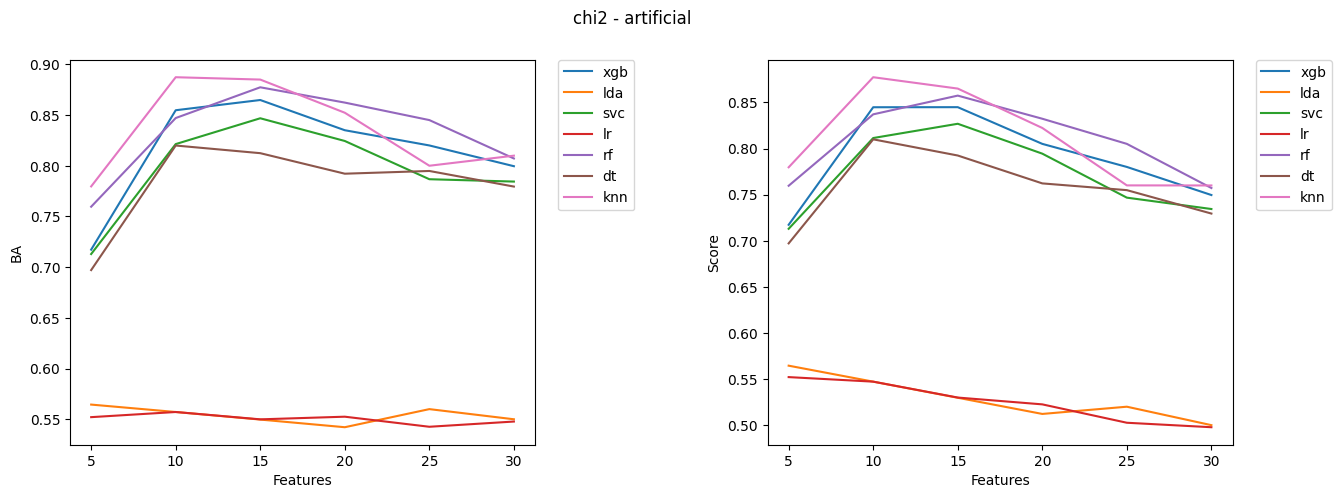

In [10]:
end_scores_chi2_art = search_best_features([5, 10, 15, 20, 25, 30], 'chi2', art_train_X, art_train_y, art_val_X, art_val_y, 'artificial')
end_scores_chi2_art.to_csv('scores/end_scores_chi2_art.csv')
plot_results(end_scores_chi2_art, "chi2 - artificial")

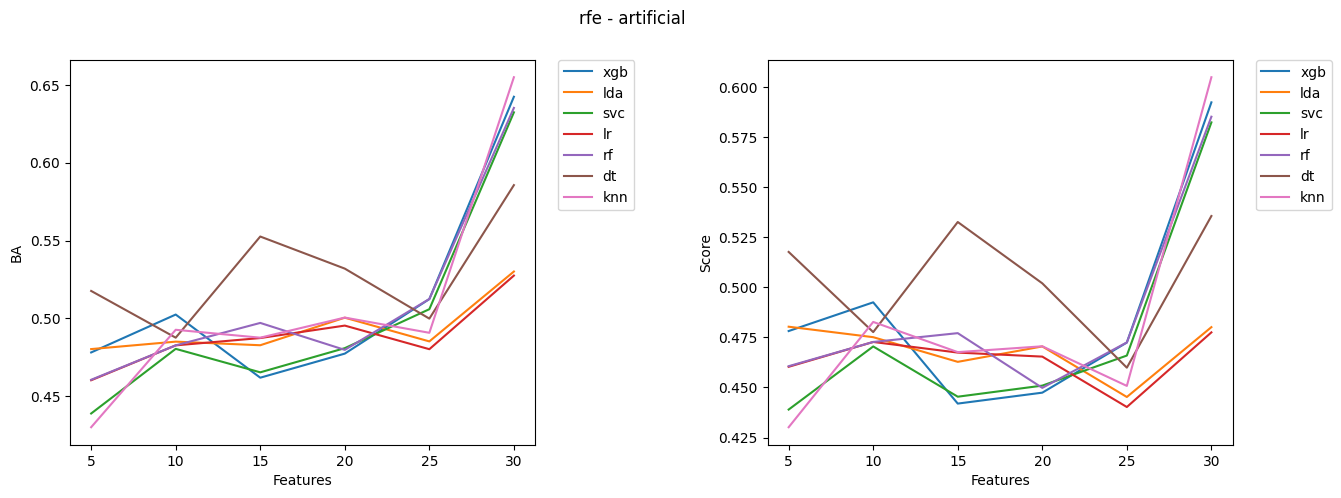

In [35]:
end_scores_rfe_art = search_best_features([5, 10, 15, 20, 25, 30], 'rfe', art_train_X, art_train_y, art_val_X, art_val_y, 'artificial')
end_scores_rfe_art.to_csv('scores/end_scores_rfe_art.csv')
plot_results(end_scores_rfe_art , "rfe - artificial")

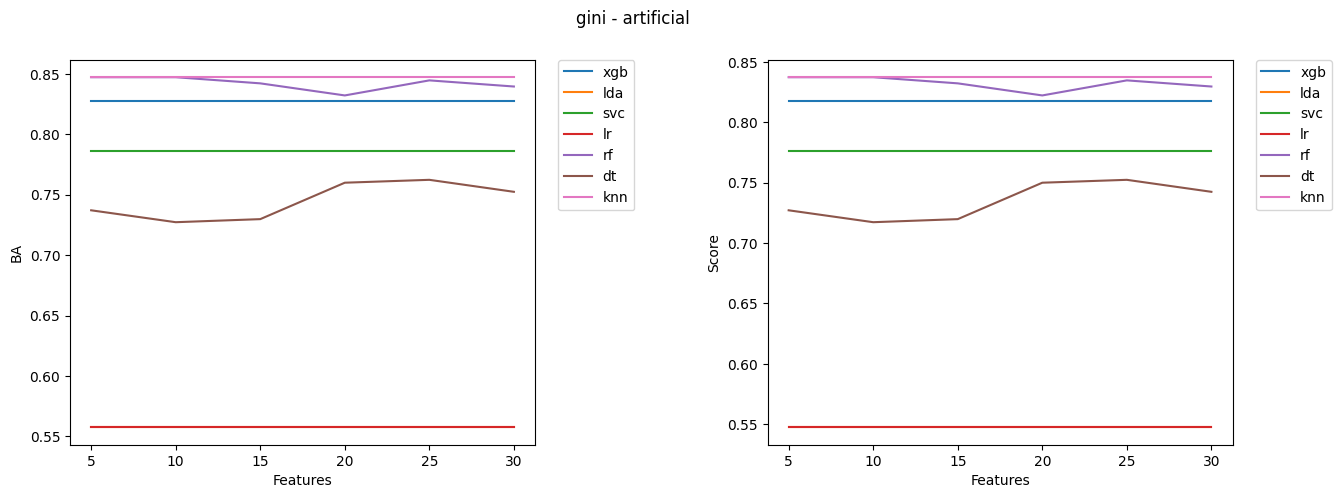

In [8]:
end_scores_gini_art = search_best_features([5, 10, 15, 20, 25, 30], 'gini', art_train_X, art_train_y, art_val_X, art_val_y, 'artificial')
end_scores_gini_art.to_csv('scores/end_scores_gini_art.csv')
plot_results(end_scores_gini_art,  "gini - artificial")

### Spam

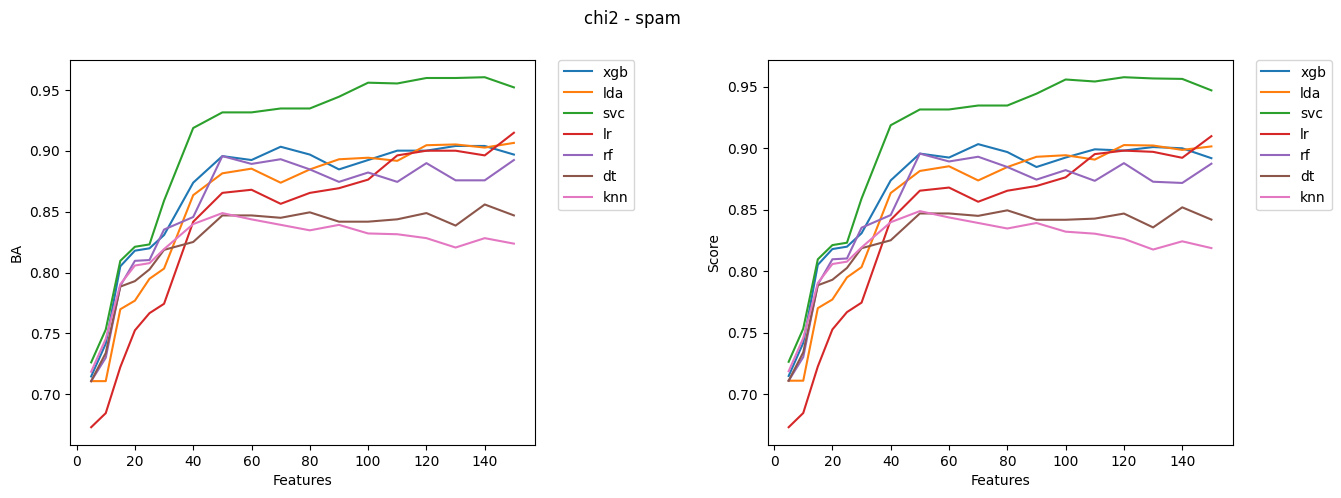

In [15]:
end_scores_chi2_spam = search_best_features([20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150], 'chi2', spam_train_X, spam_train_y, spam_val_X, spam_val_y, 'spam')
end_scores_chi2_spam.to_csv("scores/end_scores_chi2_spam.csv")
plot_results(end_scores_chi2_spam, "chi2 - spam")

In [6]:
end_scores_rfe_spam = search_best_features([25, 50, 100], 'rfe', spam_train_X, spam_train_y, spam_val_X, spam_val_y, 'spam', step=20)
end_scores_rfe_spam.to_csv("scores/end_scores_rfe_spam.csv")

Fitting estimator with 7005 features.
Fitting estimator with 6985 features.
Fitting estimator with 6965 features.
Fitting estimator with 6945 features.
Fitting estimator with 6925 features.
Fitting estimator with 6905 features.
Fitting estimator with 6885 features.
Fitting estimator with 6865 features.
Fitting estimator with 6845 features.
Fitting estimator with 6825 features.
Fitting estimator with 6805 features.
Fitting estimator with 6785 features.
Fitting estimator with 6765 features.
Fitting estimator with 6745 features.
Fitting estimator with 6725 features.
Fitting estimator with 6705 features.
Fitting estimator with 6685 features.
Fitting estimator with 6665 features.
Fitting estimator with 6645 features.
Fitting estimator with 6625 features.
Fitting estimator with 6605 features.
Fitting estimator with 6585 features.
Fitting estimator with 6565 features.
Fitting estimator with 6545 features.
Fitting estimator with 6525 features.
Fitting estimator with 6505 features.
Fitting esti

In [36]:
end_scores_rfe_spam = search_best_features([25, 50, 75, 100, 125, 150], 'rfe', spam_train_X, spam_train_y, spam_val_X, spam_val_y, 'spam')
end_scores_rfe_spam.to_csv("scores/end_scores_rfe_spam.csv")

Fitting estimator with 7005 features.
Fitting estimator with 6995 features.
Fitting estimator with 6985 features.
Fitting estimator with 6975 features.
Fitting estimator with 6965 features.
Fitting estimator with 6955 features.
Fitting estimator with 6945 features.
Fitting estimator with 6935 features.
Fitting estimator with 6925 features.
Fitting estimator with 6915 features.
Fitting estimator with 6905 features.
Fitting estimator with 6895 features.
Fitting estimator with 6885 features.
Fitting estimator with 6875 features.
Fitting estimator with 6865 features.
Fitting estimator with 6855 features.
Fitting estimator with 6845 features.
Fitting estimator with 6835 features.
Fitting estimator with 6825 features.
Fitting estimator with 6815 features.
Fitting estimator with 6805 features.
Fitting estimator with 6795 features.
Fitting estimator with 6785 features.
Fitting estimator with 6775 features.
Fitting estimator with 6765 features.
Fitting estimator with 6755 features.
Fitting esti

KeyboardInterrupt: 

In [5]:
plot_results(end_scores_rfe_spam , "rfe - spam")

NameError: name 'end_scores_rfe_spam' is not defined

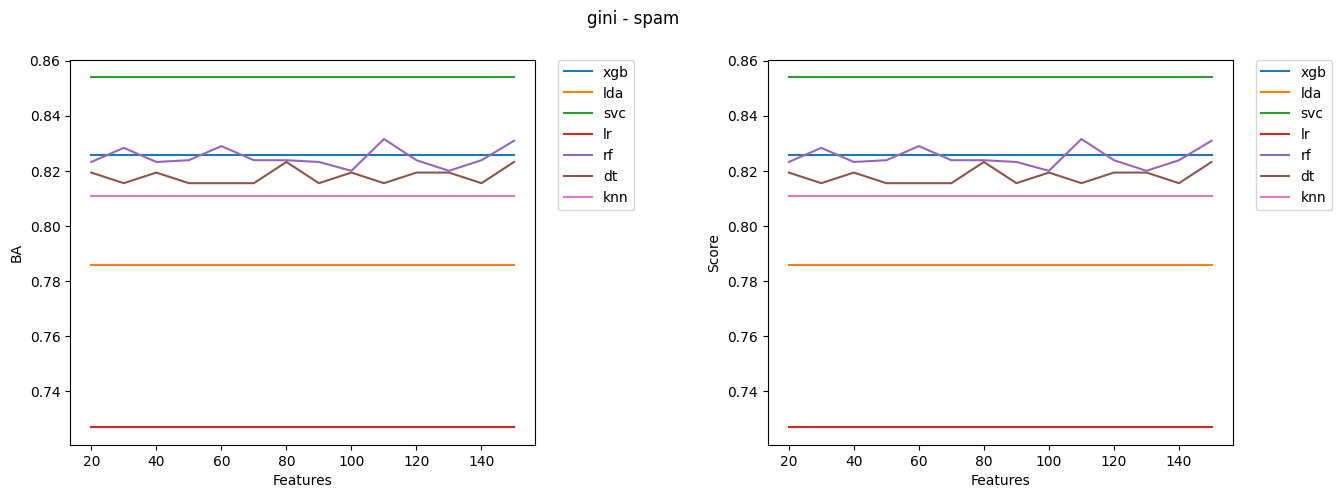

In [21]:
end_scores_gini_spam = search_best_features([20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150], 'gini', spam_train_X, spam_train_y, spam_val_X, spam_val_y, 'spam')
end_scores_gini_spam.to_csv("scores/end_scores_gini_spam.csv")
plot_results(end_scores_gini_spam , "gini - spam")

## Experiment 3 - Choose the optimal value of C for L1 method

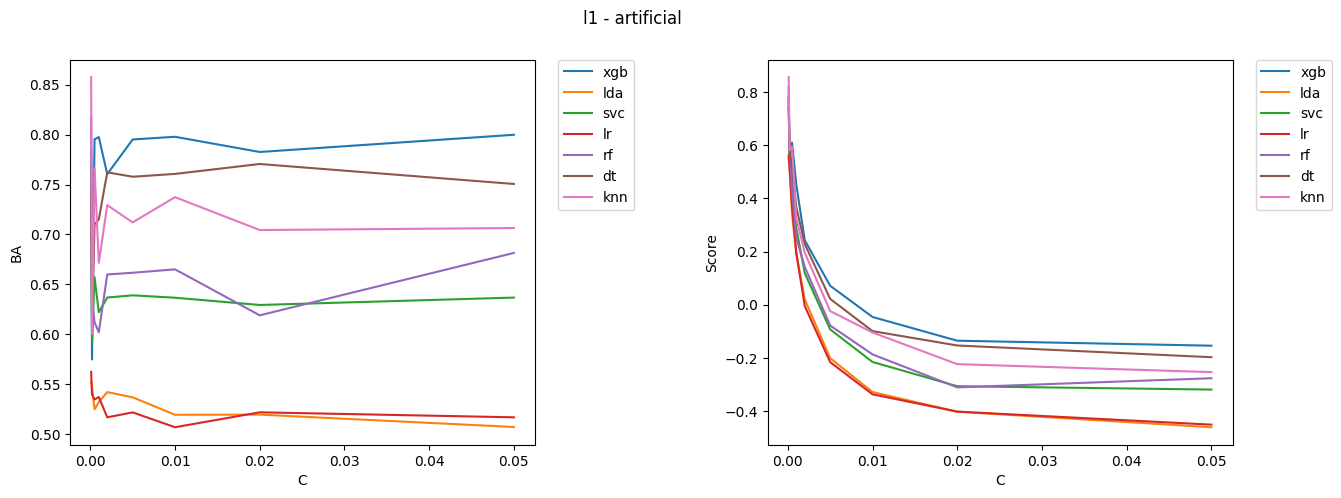

In [33]:
end_scores_l1_art = search_best_C([0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05], art_train_X, art_train_y, art_val_X, art_val_y, 'artificial')
end_scores_l1_art.to_csv("scores/end_scores_l1_art.csv")
plot_results_best_C(end_scores_l1_art, "l1 - artificial")

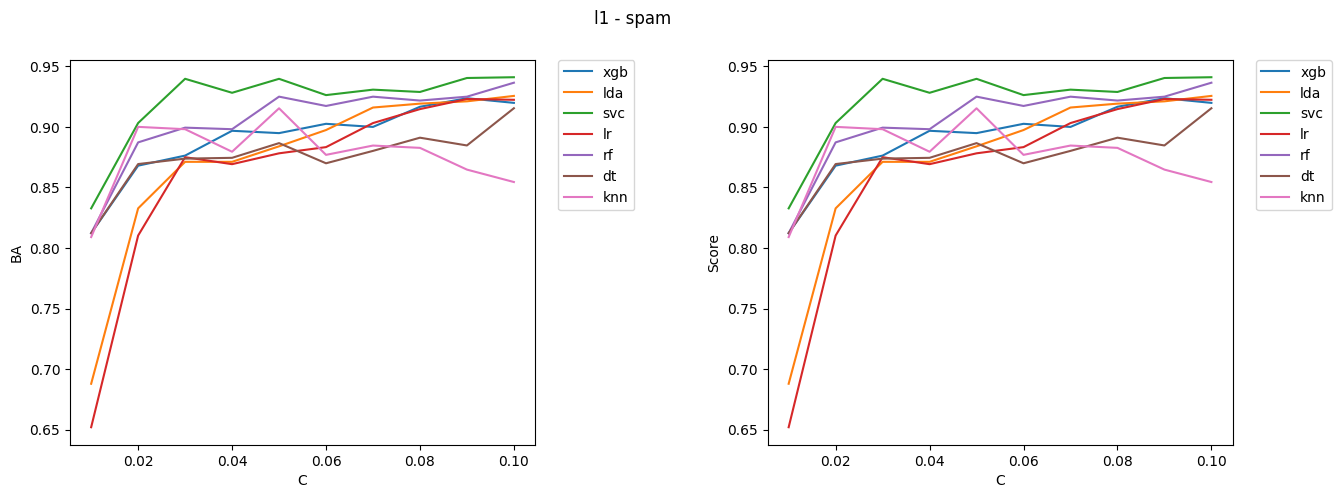

In [32]:
end_scores_l1_spam = search_best_C([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1], spam_train_X, spam_train_y, spam_val_X, spam_val_y, 'spam')
end_scores_l1_spam.to_csv("scores/end_scores_l1_spam.csv")
plot_results_best_C(end_scores_l1_spam, "l1 - spam")

## Experiment 4 - Optimal values of parameters for final model

### Artificial

boruta + knn, f=10 -  0.877287
l1 + knn,C=0.0001,0.8574304218449151,0.8554304218449151

In [227]:
last_comparison_artificial=pd.DataFrame(index=['chi2', 'gini', 'boruta'],
                            columns=['BA', 'Score', 'Model'])

In [228]:
#boruta
last_comparison_artificial.loc['boruta']= [0.879673, 0.847673, 'rf']

In [229]:
# chi2
art_train_X_chi2_features=chi2_select_features(art_train_X, art_train_y, 10)
art_train_X_chi2=change_data_with_selected_features(art_train_X, art_train_X_chi2_features)
art_val_X_chi2=change_data_with_selected_features(art_val_X, art_train_X_chi2_features)
art_test_data_chi2=change_data_with_selected_features(art_test_data, art_train_X_chi2_features)

model = 'knn'
BA, score=train_model(model, art_train_X_chi2, art_train_y, art_val_X_chi2, art_val_y, 'artificial')
last_comparison_artificial.loc['chi2']=[BA, score, model]

In [230]:
# gini
art_train_X_gini_features=gini_select_features(art_train_X, art_train_y, depth=3, if_less=True, num_to_select=5)
art_train_X_gini=change_data_with_selected_features(art_train_X, art_train_X_gini_features)
art_val_X_gini=change_data_with_selected_features(art_val_X, art_train_X_gini_features)
art_test_data_gini=change_data_with_selected_features(art_test_data, art_train_X_gini_features)

model = 'knn'
BA, score=train_model(model, art_train_X_gini, art_train_y, art_val_X_gini, art_val_y, 'artificial')
last_comparison_artificial.loc['gini']=[BA, score, model]

In [231]:
last_comparison_artificial #best is boruta with rf

,BA,Score,Model
chi2,0.789578,0.759578,knn
gini,0.707097,0.707097,knn
boruta,0.879673,0.847673,rf


### Spam

svc + chi2, f=120 - 0.95583	0.95583


In [232]:
last_comparison_spam=pd.DataFrame(index=['chi2', 'rfe','gini', 'boruta'],
                            columns=['BA', 'Score', 'Model'])

In [233]:
#boruta
last_comparison_spam.loc['boruta']= [0.867583, 0.867583, 'knn']

In [234]:
#chi 2
spam_train_X_chi2_features=chi2_select_features(spam_train_X, spam_train_y, 100)
spam_train_X_chi2=change_data_with_selected_features(spam_train_X, spam_train_X_chi2_features)
spam_val_X_chi2=change_data_with_selected_features(spam_val_X, spam_train_X_chi2_features)
spam_test_data_chi2=change_data_with_selected_features(spam_test_data, spam_train_X_chi2_features)

model = 'svc'
BA, score=train_model(model, spam_train_X_chi2, spam_train_y, spam_val_X_chi2, spam_val_y, 'spam')
last_comparison_spam.loc['chi2']=[BA, score, model]

In [239]:
%%capture
#rfe
spam_train_X_rfe_features=rfe_select_features(spam_train_X, spam_train_y, 100)
spam_train_X_rfe=change_data_with_selected_features(spam_train_X, spam_train_X_rfe_features)
spam_val_X_rfe=change_data_with_selected_features(spam_val_X, spam_train_X_rfe_features)
spam_test_data_rfe=change_data_with_selected_features(spam_test_data, spam_train_X_rfe_features)

model = 'svc'
BA, score=train_model(model, spam_train_X_rfe, spam_train_y, spam_val_X_rfe, spam_val_y, 'spam')
last_comparison_spam.loc['rfe']=[BA, score, model]

In [235]:
#gini
spam_train_X_gini_features=gini_select_features(spam_train_X, spam_train_y, depth=3, if_less=True, num_to_select=100)
spam_train_X_gini=change_data_with_selected_features(spam_train_X, spam_train_X_gini_features)
spam_val_X_gini=change_data_with_selected_features(spam_val_X, spam_train_X_gini_features)
spam_test_data_gini=change_data_with_selected_features(spam_test_data, spam_train_X_gini_features)

model = 'svc'
BA, score=train_model(model, spam_train_X_gini, spam_train_y, spam_val_X_gini, spam_val_y, 'spam')
last_comparison_spam.loc['gini']=[BA, score, model]

In [240]:
last_comparison_spam #chi2 with svc is the best

,BA,Score,Model
chi2,0.95583,0.95583,svc
rfe,0.939809,0.939809,svc
gini,0.937874,0.937874,svc
boruta,0.867583,0.867583,knn


### Predict for atest data

In [242]:
art_model = RandomForestClassifier()
art_model.fit(art_train_X_boruta2, art_train_y)
art_test_y_pred_proba=art_model.predict_proba(art_test_data_boruta2)

In [247]:
prob_test_art=art_test_y_pred_proba[:,1]

In [253]:
features_art=np.array(art_train_X_boruta2.columns)

In [257]:
features_art

array([ 28,  48,  64, 105, 128, 153, 204, 241, 281, 318, 336, 338, 378,
       424, 433, 442, 451, 453, 472, 475, 493], dtype=int64)

In [255]:
#save to txt files
np.savetxt('AGAKAC_artificial_prediction.txt', prob_test_art)
np.savetxt('AGAKAC_artificial_features.txt', features_art)
# do nich trzeba dodać w pierwszej linii jeszcze raz ten kod, który jest w nazwie

predict for spam test data for the best model

In [260]:
spam_model = SVC(probability=True)
spam_model.fit(spam_train_X_chi2, spam_train_y)
spam_test_y_pred_proba=spam_model.predict_proba(spam_test_data_chi2)
spam_test_y_pred=spam_model.predict(spam_test_data_chi2)

In [263]:
prob_test_spam=spam_test_y_pred_proba[:,1]

In [269]:
features_spam=np.where(spam_train_X_chi2_features==True)[0]


In [272]:
features_spam

array([   0,   41,  219,  220,  228,  244,  254,  256,  260,  265,  269,
        293,  316,  339,  462,  463,  464,  536,  552,  601,  604,  765,
        915, 1008, 1036, 1039, 1040, 1281, 1444, 1446, 1461, 1508, 1647,
       1679, 1691, 1701, 1716, 1721, 1754, 1780, 1791, 1888, 1919, 2215,
       2373, 2467, 2703, 2735, 2832, 2951, 3199, 3381, 3625, 3627, 3648,
       3737, 3846, 4099, 4100, 4104, 4204, 4249, 4338, 4347, 4486, 4493,
       4527, 4640, 4753, 4819, 4890, 4893, 4998, 5030, 5079, 5165, 5231,
       5310, 5430, 5459, 5865, 5956, 6131, 6289, 6290, 6409, 6415, 6417,
       6434, 6486, 6502, 6539, 6577, 6623, 6733, 6803, 6814, 6841, 6856,
       6912], dtype=int64)

In [273]:
#save to txt files
np.savetxt('AGAKAC_spam_prediction.txt', prob_test_spam)
np.savetxt('AGAKAC_spam_features.txt', features_spam)
# do nich trzeba dodać w pierwszej linii jeszcze raz ten kod, który jest w nazwie